In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def compareImages(original: object, edited: object) -> object:
    plt.figure(figsize=(10, 30))
    plt.subplot(121), plt.imshow(original, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edited,cmap = 'gray')
    plt.title('Edited Image'), plt.xticks([]), plt.yticks([])
    plt.show()



In [3]:
img = cv.imread('images/receipt_2.jpg')

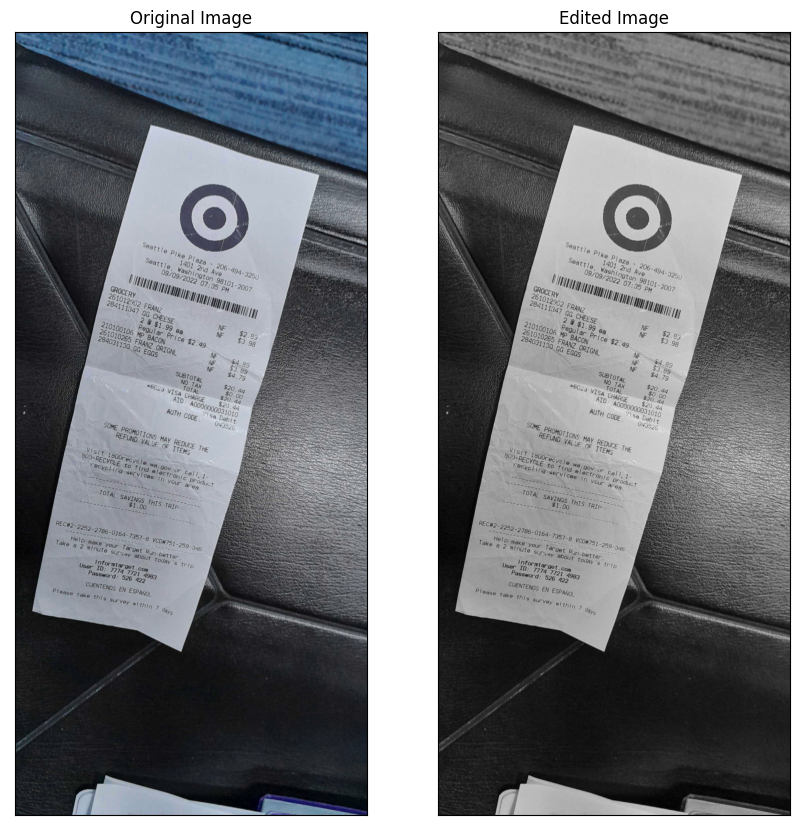

In [4]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
compareImages(img, gray)

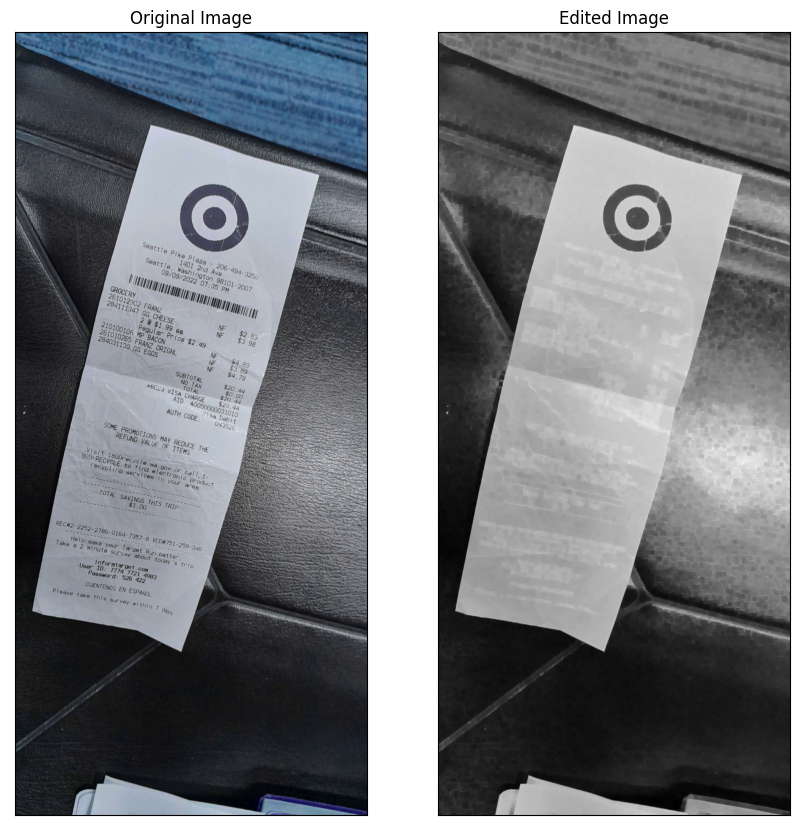

In [5]:
morph_kernel = np.ones((5,5),np.uint8)
morphed = cv.morphologyEx(gray, cv.MORPH_CLOSE, morph_kernel, iterations=4)
compareImages(img, morphed)

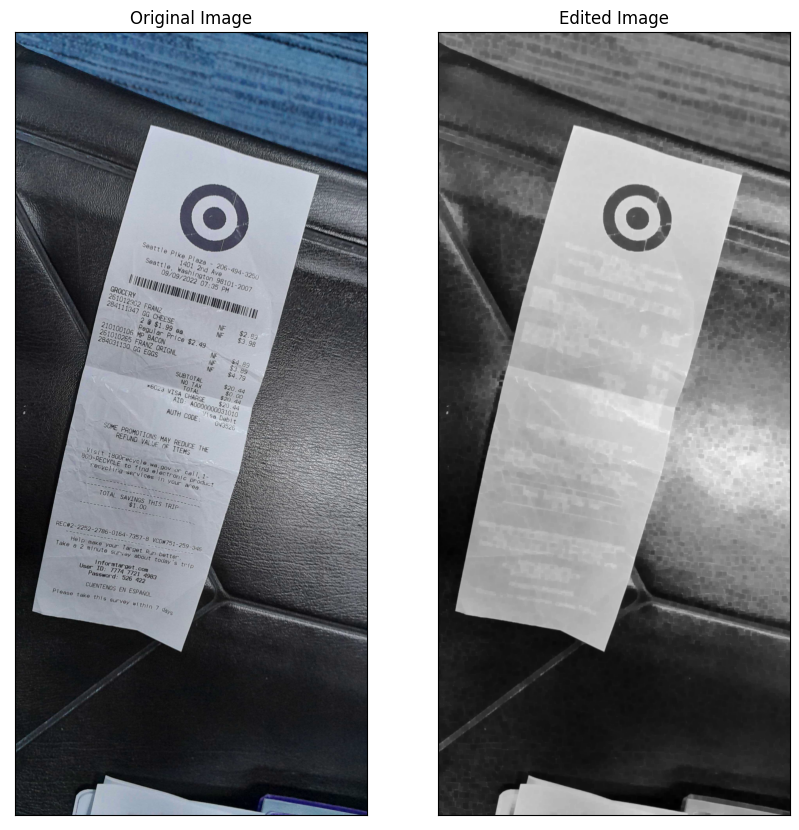

In [6]:
blur = cv.GaussianBlur(morphed, (5, 5), 1)
compareImages(img, blur)

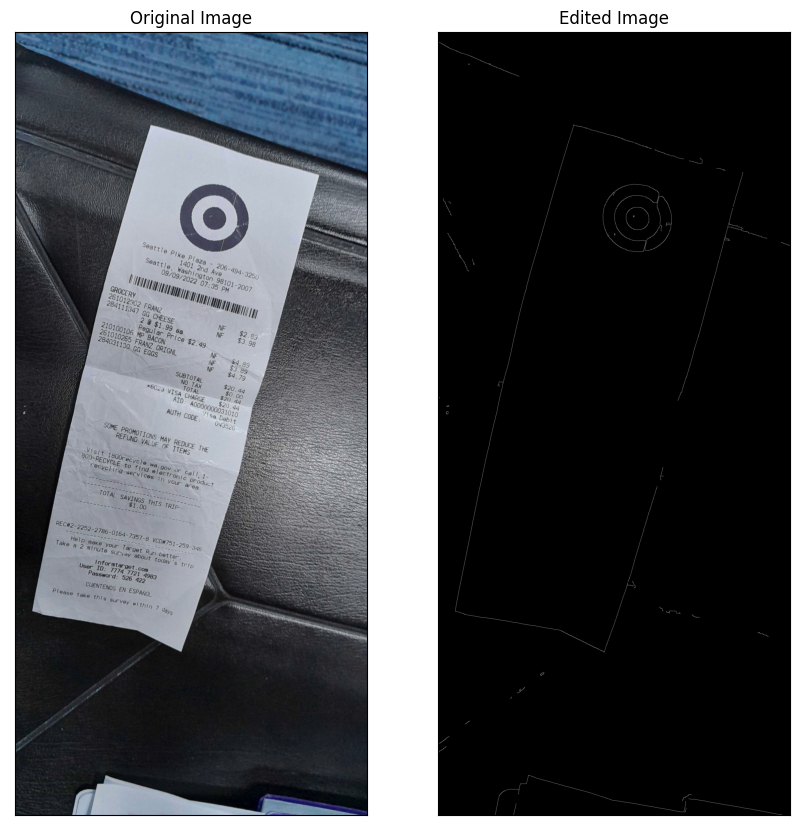

In [7]:
edged= cv.Canny(blur, 75, 200)
compareImages(img, edged)

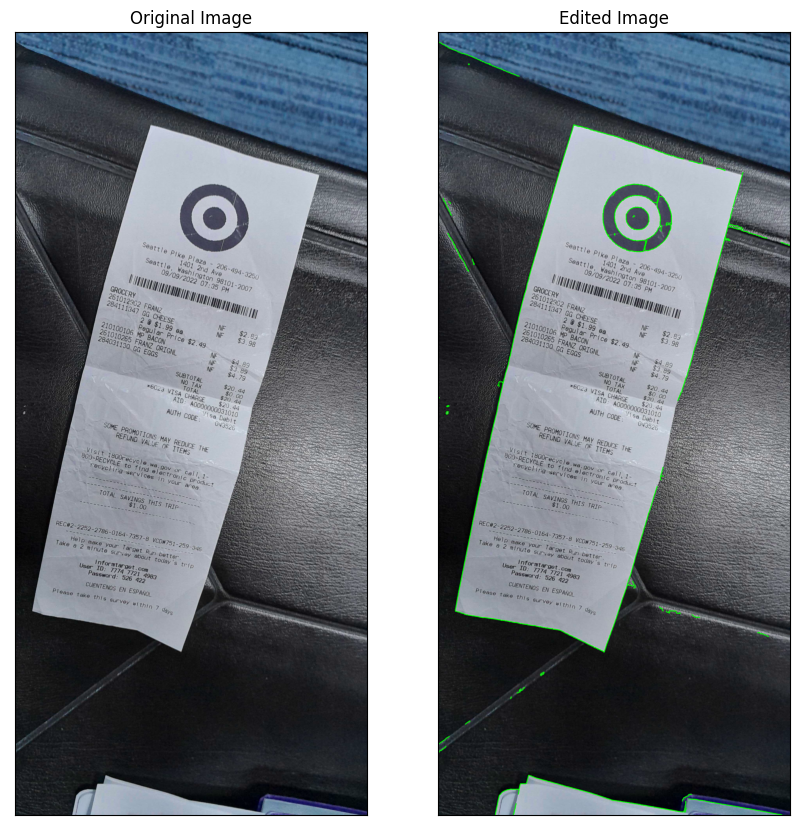

In [8]:
contours, _ = cv.findContours(edged, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv.contourArea, reverse=True)

contourImage = img.copy()
cv.drawContours(contourImage, contours, -1, (0, 255, 0), 3)
compareImages(img, contourImage)

In [36]:
def approx_percentage_of_img(approx, img):
    approx = sorted(np.concatenate(approx).tolist())
    height = img.shape[0]
    width = img.shape[1]
    approx = np.array(approx)
    print("np_approx: ", approx)
    sum_xy = approx.sum(axis=1)
    print("sum: ", sum_xy)
    top_left = approx[np.argmin(sum_xy)]
    bottom_right =  approx[np.argmax(sum_xy)]
    rect_width = abs(top_left[0] - bottom_right[0])
    rect_height = abs(top_left[1] - bottom_right[1])
    percentage = (rect_width/width, rect_height/height)
    print(percentage)
    return percentage

def approx_is_large_enough(approx, img, threshold):
    return approx_percentage_of_img(approx, img)[0] >= threshold[0] and approx_percentage_of_img(approx, img)[1] >= threshold[1]


for contour in contours:
    peri = cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, 0.015 * peri, False)
    if len(approx) == 4:
        print(approx)
        if approx_is_large_enough(approx, img, (0.02, 0.002)):
            doc_cnts = approx
            break

[[[1480  996]]

 [[1545 1009]]

 [[1651 1048]]

 [[1497  996]]]
np_approx:  [[1480  996]
 [1497  996]
 [1545 1009]
 [1651 1048]]
sum:  [2476 2493 2554 2699]
(0.095, 0.013)
np_approx:  [[1480  996]
 [1497  996]
 [1545 1009]
 [1651 1048]]
sum:  [2476 2493 2554 2699]
(0.095, 0.013)


[[[   0    0]]

 [[1800 4000]]

 [[1800 4000]]

 [[   0    0]]]


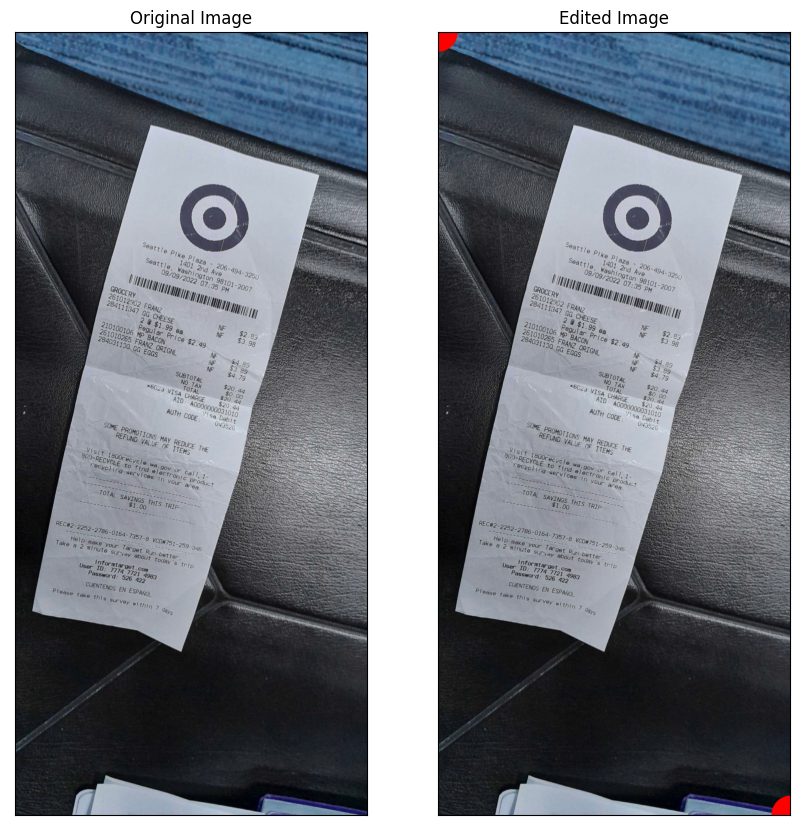

In [67]:
corners = img.copy()
doc_cnts2 = np.array([[[0, 0]], [[img.shape[1], img.shape[0]]], [[1800, 4000]], [[0, 0]]])
print(doc_cnts2)

cv.drawContours(corners, doc_cnts2, -1, (255, 0, 0), 200)
compareImages(img, corners)

In [ ]:
from imutils.perspective import four_point_transform

warped = four_point_transform(img, doc_cnts.reshape(4, 2))

compareImages(img, warped)